# Load All necessary libraries with iris dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.datasets import load_iris

## save an instance of the loaded iris dataset in the in a variable named iris

In [2]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Use Describe method inorder to findout the statistical measurements of the dataset


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Check for null values

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

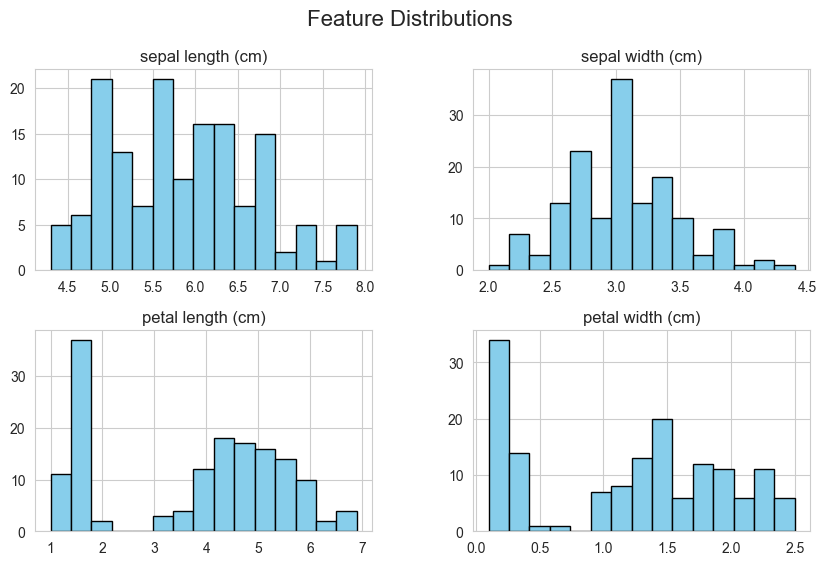

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
df.drop("target",axis=1).hist(figsize=(10, 6), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


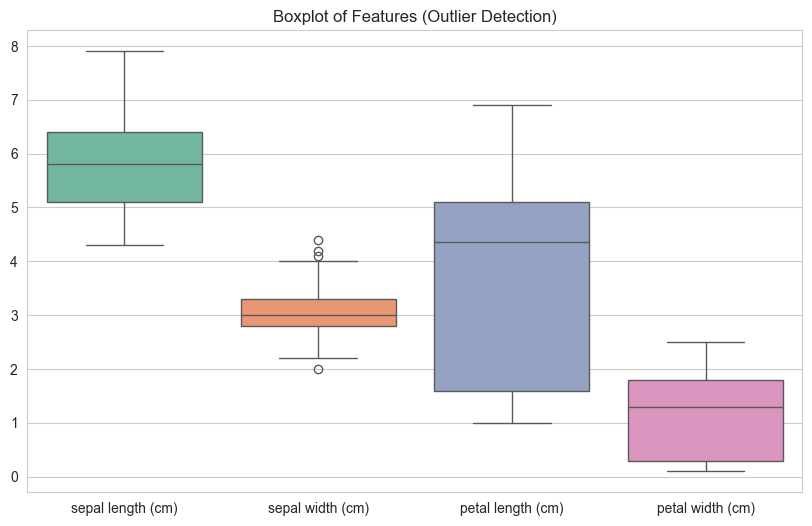

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('target',axis=1), palette="Set2")
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()

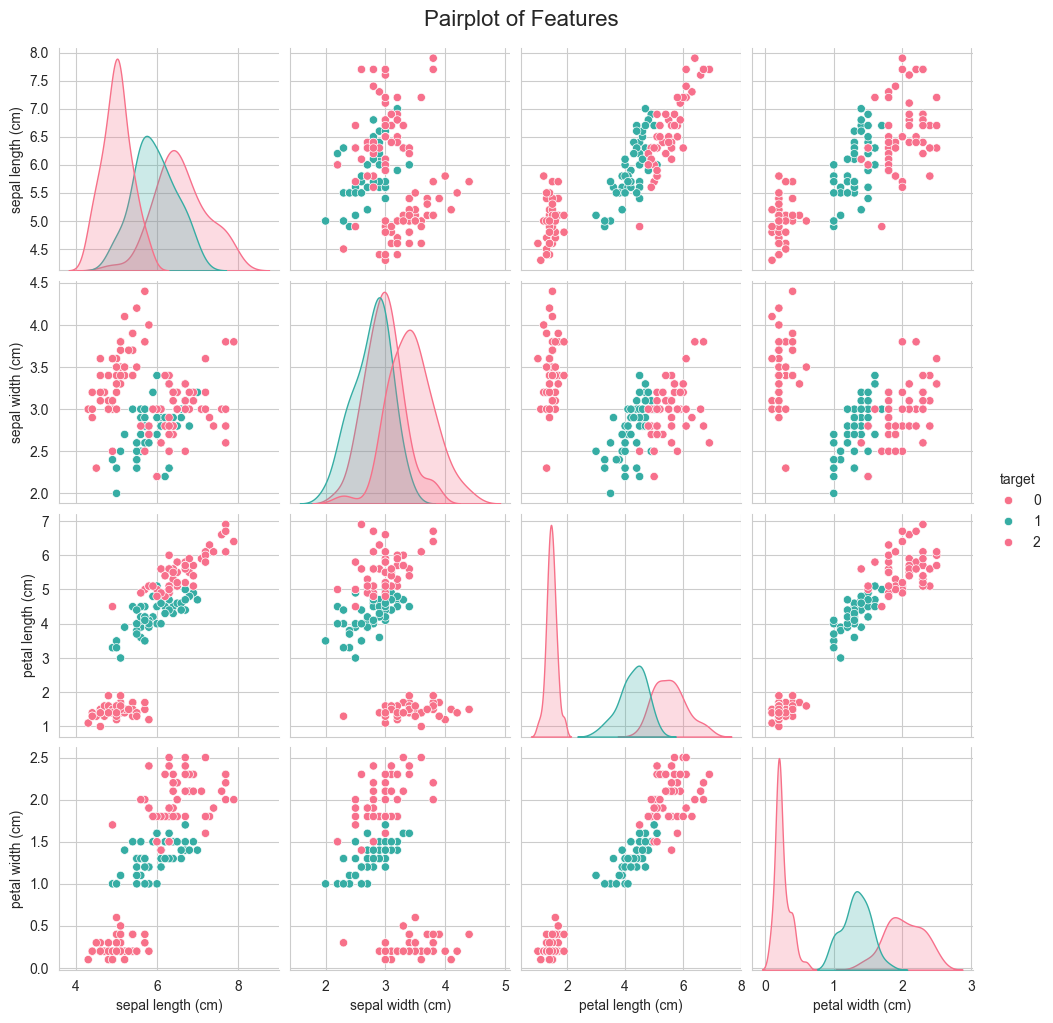

In [7]:
sns.pairplot(df, hue="target", palette="husl")
plt.suptitle("Pairplot of Features", y=1.02, fontsize=16)
plt.show()

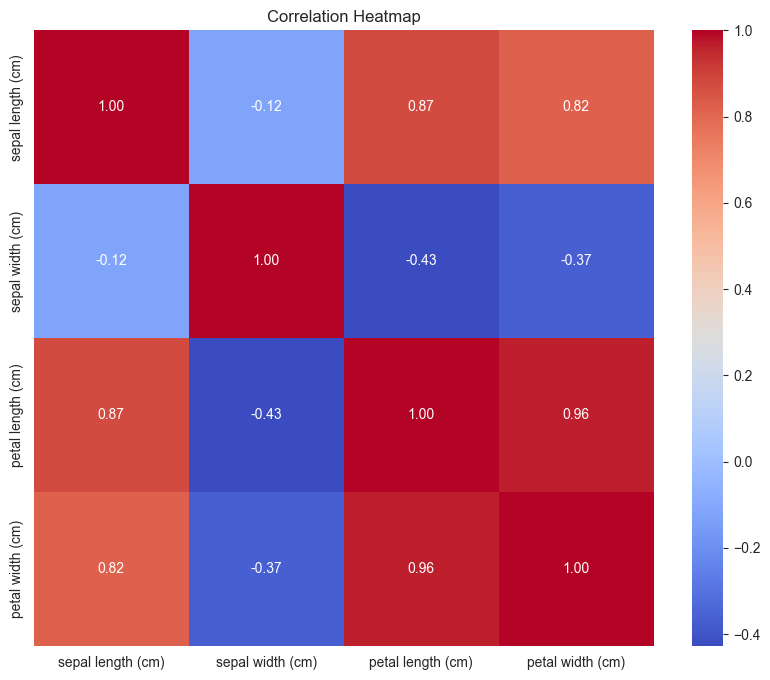

In [8]:
from scipy.stats import pearsonr

correlation_matrix=df.drop("target",axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
for col in df.columns:
    if col != 'target':
        df.rename(columns={col: col.replace(" (cm)", "")}, inplace=True)

# Outlier handiling

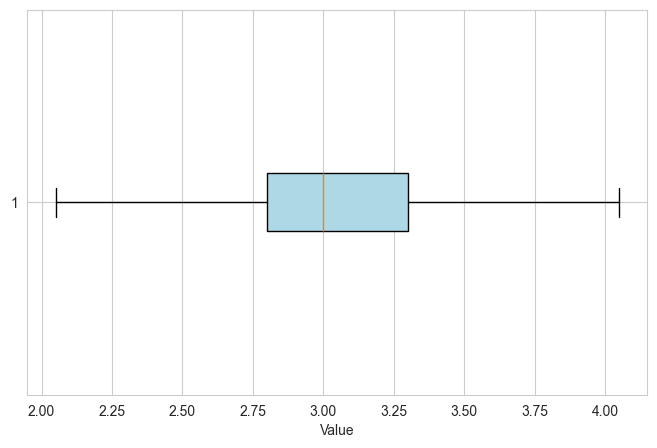

In [10]:
def capping(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


capping('sepal width')

plt.figure(figsize=(8, 5))
plt.boxplot(df['sepal width'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel("Value")
plt.show()


# Since the correlation between petal width and petal length is 0.96 using PCA on those two features

In [11]:
vals=df['target'].value_counts()
print(vals)

target
0    50
1    50
2    50
Name: count, dtype: int64


In [12]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_x=scaler.fit_transform(df.drop('target',axis=1))
scaled_df=pd.DataFrame(Scaled_x)
scaled_df.columns=df.drop('target',axis=1).columns
scaled_df.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.051961,-1.340227,-1.315444
1,-1.143017,-0.127367,-1.340227,-1.315444
2,-1.385353,0.344364,-1.397064,-1.315444
3,-1.506521,0.108498,-1.283389,-1.315444
4,-1.021849,1.287827,-1.340227,-1.315444


In [14]:
import pickle
pickle.dump(scaler,open('StandardScaler.pkl','wb'))

In [15]:
from sklearn.decomposition import PCA

X=scaled_df[['petal length','petal width']]
pca=PCA(0.95)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_


In [16]:
explained_variance

array([0.98143272])

In [17]:
pca_col=X_pca
pca_df=pd.DataFrame(data=pca_col,columns=['Petal details'])
final_df=pd.concat([pca_df,df.drop(['petal length','petal width'],axis=1)],axis=1)
final_df.head()

,Petal details,sepal length,sepal width,target
0,-1.877843,5.1,3.5,0
1,-1.877843,4.9,3.0,0
2,-1.918033,4.7,3.2,0
3,-1.837653,4.6,3.1,0
4,-1.877843,5.0,3.6,0


In [18]:
pickle.dump(pca,open('pca.pkl','wb'))

In [ ]:

import h2o
from h2o.automl import H2OAutoML

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/265.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/265.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/265.9 MB 1.7 MB/s eta 0:02:39
   ---------------------------------------- 1.0/265.9 MB 1.9 MB/s eta 0:02:23
   ---------------------------------------- 1.3/265.9 MB 1.8 MB/s eta 0:02:30
   ---------------------------------------- 1.8/265.9 MB 2.0 MB/s eta 0:02:12
   ---------------------------------------- 2.4/265.9 MB 2.0 MB/s eta 0:02:12
   ---------------------------------------- 2.9/265.9 MB 2.1 MB/s eta 0:02:04
    --------------------------------------- 3.4/265.9 MB 2.2 MB/s eta 0:01:59
    --------------------------------------- 4.2/265.9 MB 2.4 MB/s eta 0:01:52
    --------------------------------------- 5.0/265.9 MB 2.5 MB/s eta 0:01:45
    --------------------------------------- 5.8/265.9 MB 2.6 MB/s eta 0:01:41



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\binar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
from sklearn.model_selection import train_test_split
h2o.init()
X=final_df.drop('target',axis=1)
y=final_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


train_df = X_train.copy()
train_df['target'] = y_train
test_df = X_test.copy()
test_df['target'] = y_test

train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

target = 'target'
features = [col for col in train_h2o.columns if col != target]


aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=600)
aml.train(x=features, y=target, training_frame=train_h2o)

lb = aml.leaderboard
print(lb)

best_model = aml.leader
print('best model is',best_model)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from C:\Users\binar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\binar\AppData\Local\Temp\tmp4lcgsbet
  JVM stdout: C:\Users\binar\AppData\Local\Temp\tmp4lcgsbet\h2o_binara_started_from_python.out
  JVM stderr: C:\Users\binar\AppData\Local\Temp\tmp4lcgsbet\h2o_binara_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Colombo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_binara_x2bzqn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.887 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:25:28.143: AutoML: XGBoost is not available; skipping it.


18:25:29.26: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20250329_182528     0.164871  0.0271825  0.0856417  0.0701748                 0.0271825
DeepLearning_grid_2_AutoML_1_20250329_182528_model_2     0.16579   0.0274863  0.0958246  0.0797342                 0.0274863
StackedEnsemble_BestOfFamily_1_AutoML_1_20250329_182528  0.166941  0.0278694  0.0828596  0.0698239                 0.027869

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

X = final_df.drop(columns=['target'])
y = final_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gbm.fit(X_train, y_train)


y_pred = gbm.predict(X_test)
y_train_pred = gbm.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(classification_report(y_test, y_pred))




Training Accuracy: 1.0
Testing Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


print(f"Best hyperparameters: {grid_search.best_params_}")

best_gbm = grid_search.best_estimator_


y_pred = best_gbm.predict(X_test)

y_train_pred = best_gbm.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Training Accuracy: 0.9750
Testing Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
import joblib
joblib.dump(best_gbm, 'random_forest_model.joblib')

['random_forest_model.joblib']